# Static Equilibrium of a Double Wishbone Suspension

The static equilibrium of a double wishbone suspension can be solved by considering the system as a truss, where the geometry is defined by the hardpoints and the direction of the reaction forces are known, given by the unit vectors of each suspension link. The objective is to form a [system of linear equations](https://en.wikipedia.org/wiki/System_of_linear_equations) in a $Ax = B$ matrix form. Where the first three rows of the system are the sum of the forces on $x$, $y$ and $z$ direction, and the last three rows are the moment balance taken around a arbitrary  point. 

If you are not familiar with vector mechanics, there is an excelent book [Vector Mechanics for Engineers: Statics and Dynamics](https://www.amazon.com/Vector-Mechanics-Engineers-Statics-Dynamics/dp/0073398241). Chapters 2, 3 and 4 have all you need to do the job. 

In the free body diagram (FBD) below, the suspension system is defined by the points $A, B, D, E, J, I, H, Q, G, K$ and $O$, the direction of each member are given by the unit vectors $\vec u_{1}, \vec u_{2}, \vec u_{3}, \vec u_{4}, \vec u_{5}$ and $\vec u_{6}$. The unkown reaction forces are represented by $r_{GO}, r_{KO}, r_{EO}, r_{DO}, r_{JO}$ and $r_{HO}$.

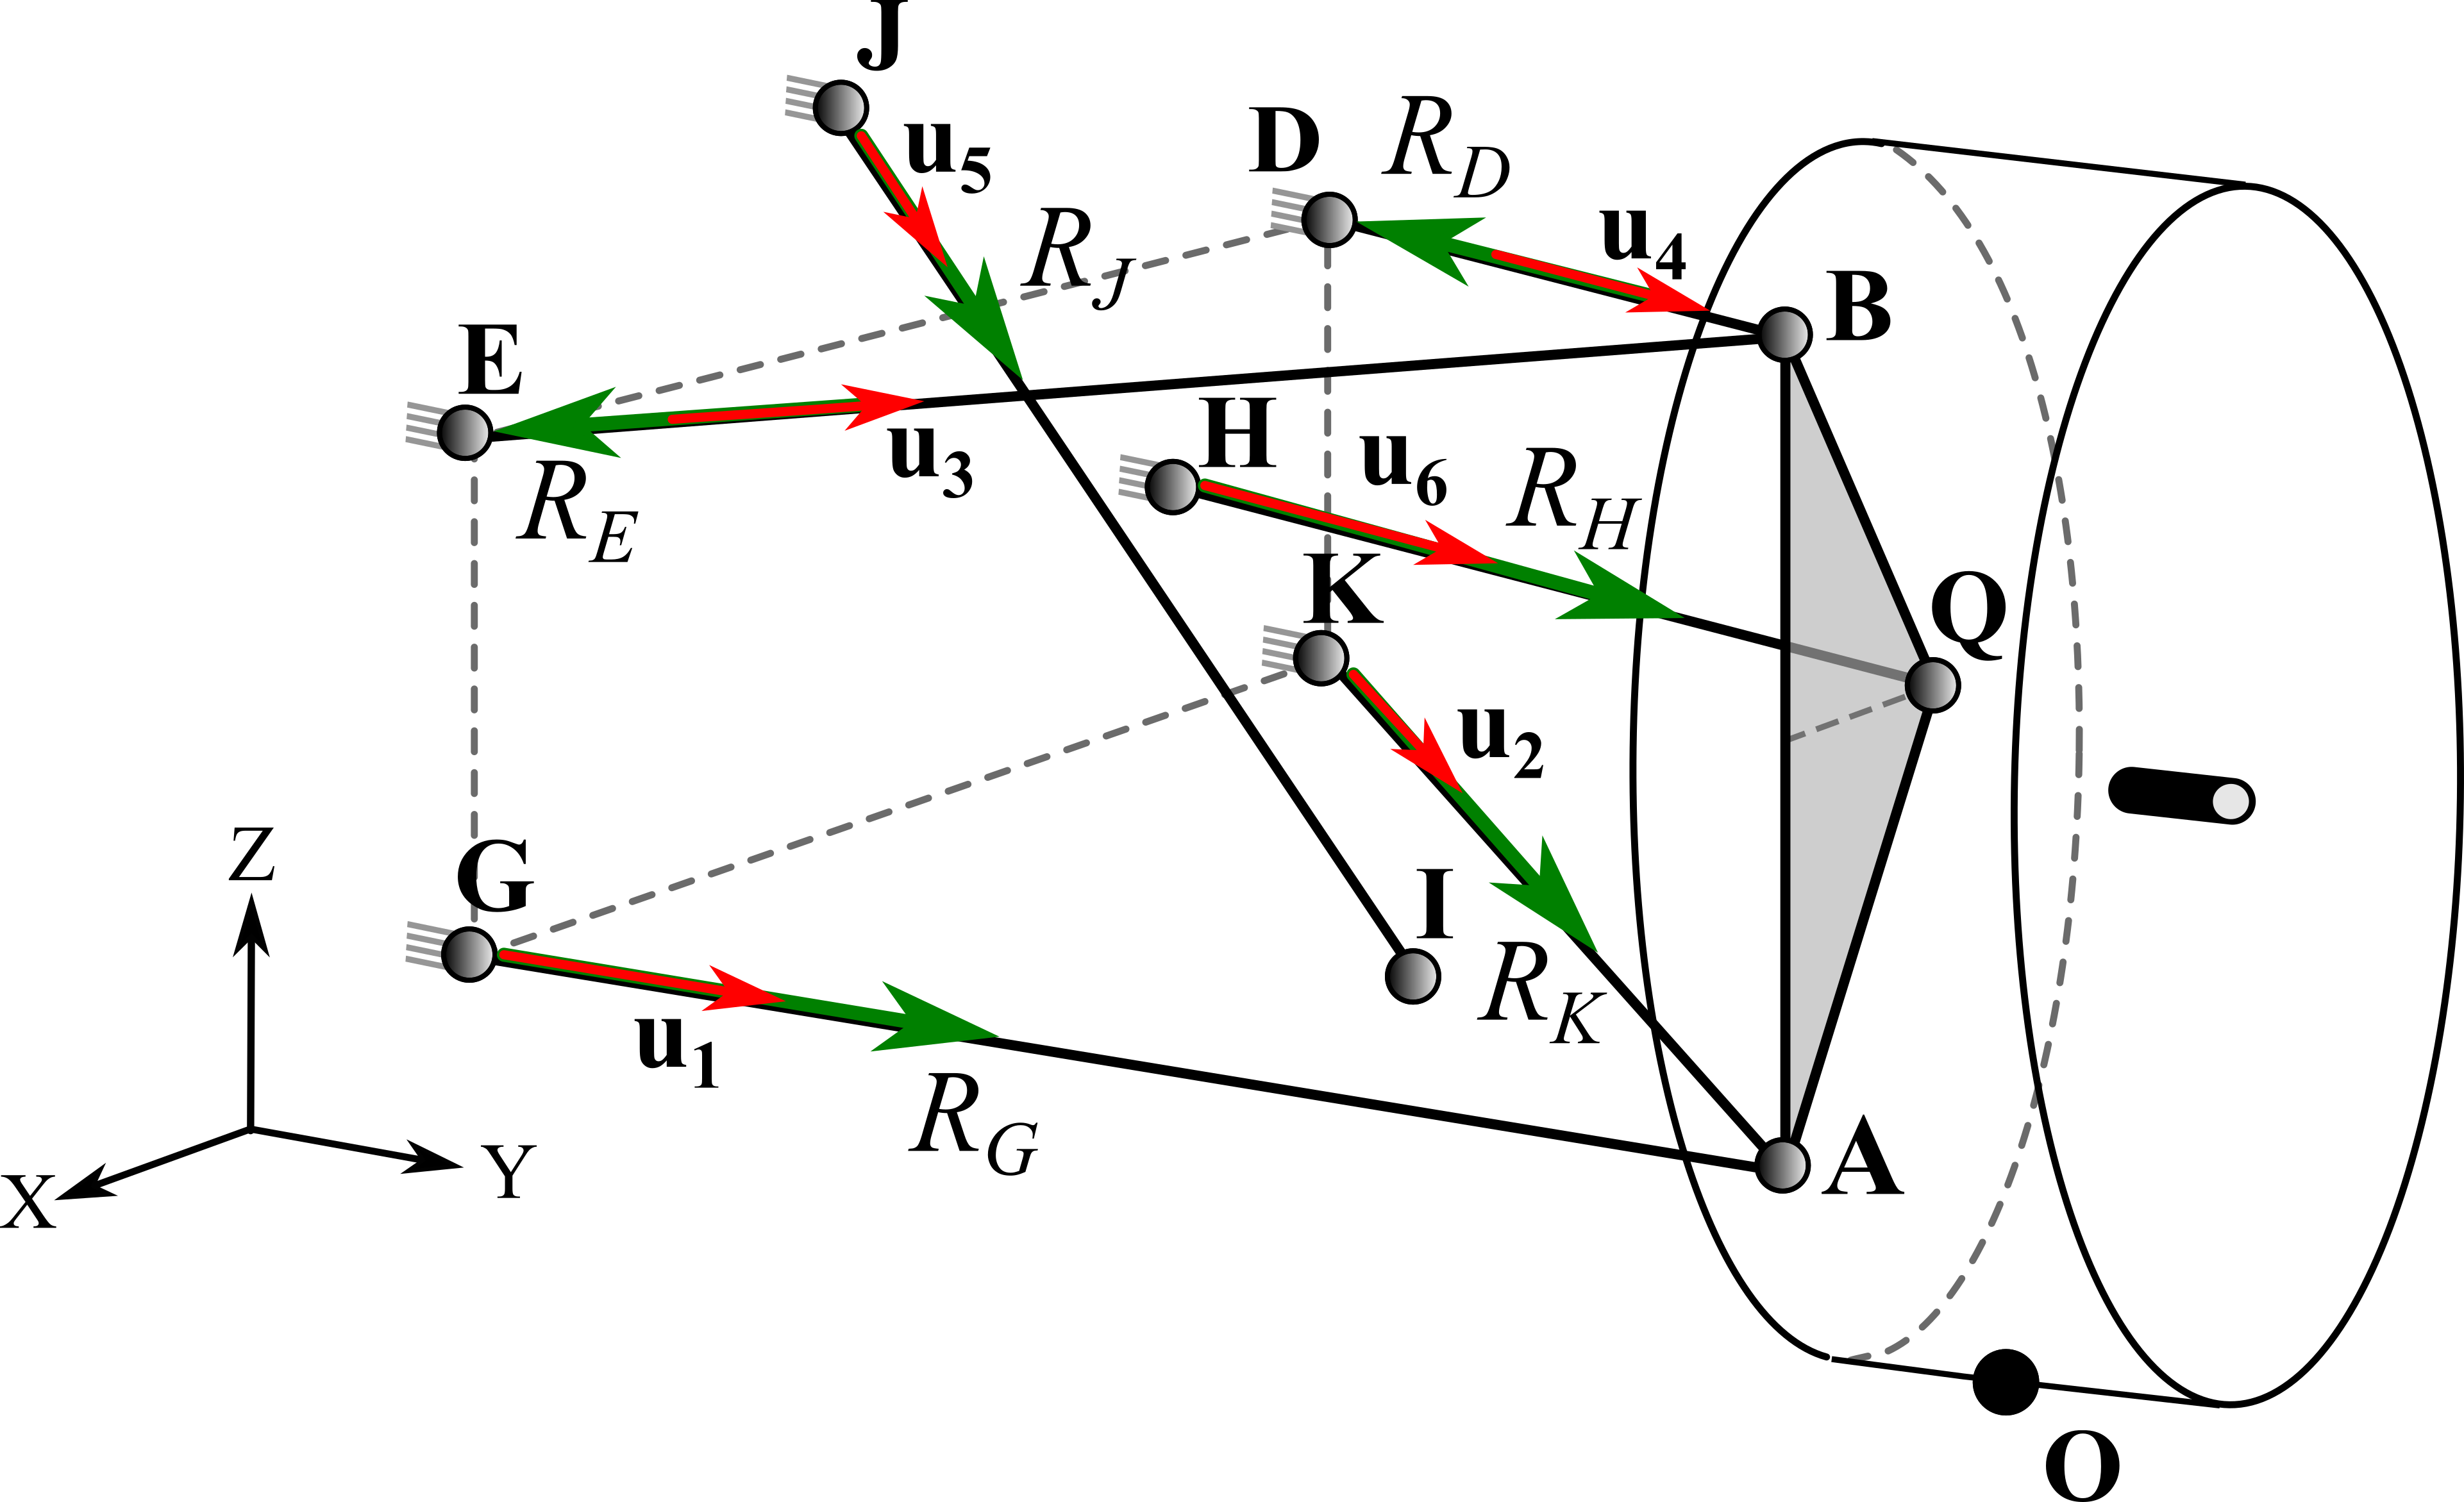

In [8]:
from IPython.display import Image
Image('double_wishbone.png', width=500)

## Building $A$ matrix


The first three rows of the $A$ matrix are straightforward. They are nothing more than each $x, y, z$ component of the unit vectors. As an example, let's consider point $G = [g_x, g_y, g_z]$ and point $A = [a_x, a_y, a_z]$. 
The unit vector $\vec u_1$ is the vector $\vec {AG}$ divided by its magnitude:

$\vec u_1  = \frac{\vec{AG}}{\left | AG \right |}$

Let's take a look on how it looks line in [SymPy](https://www.sympy.org/en/index.html):

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import init_printing
init_printing(use_latex='mathjax', pretty_print=False)
from sympy import *

A = Matrix(np.array([0, 2, 2]))
G = Matrix(np.array([5, 6, 2]))
AG = G - A
u_1 = AG.normalized()

# Print point A, point G, vector AG and unit vector u_1
A, G, AG, u_1

(Matrix([
[0],
[2],
[2]]), Matrix([
[5],
[6],
[2]]), Matrix([
[5],
[4],
[0]]), Matrix([
[5*sqrt(41)/41],
[4*sqrt(41)/41],
[            0]]))

The lower part of the $A$ matrix is given by the components of the moment arm of the forces applied to an arbitrary point at which the moments are balanced. Remember that the moment caused by a given force around an axis is the magnitude of the force times the perpendicular distance to that axis. This is very well explained in [section 3.2](https://www.amazon.com/Vector-Mechanics-Engineers-Statics-Dynamics/dp/0073398241). 

Consider the figure below, we want to find the components in $x, y$ and $z$ components of the moment caused by the reaction force $R_G$ around the tire contact patch $O$.

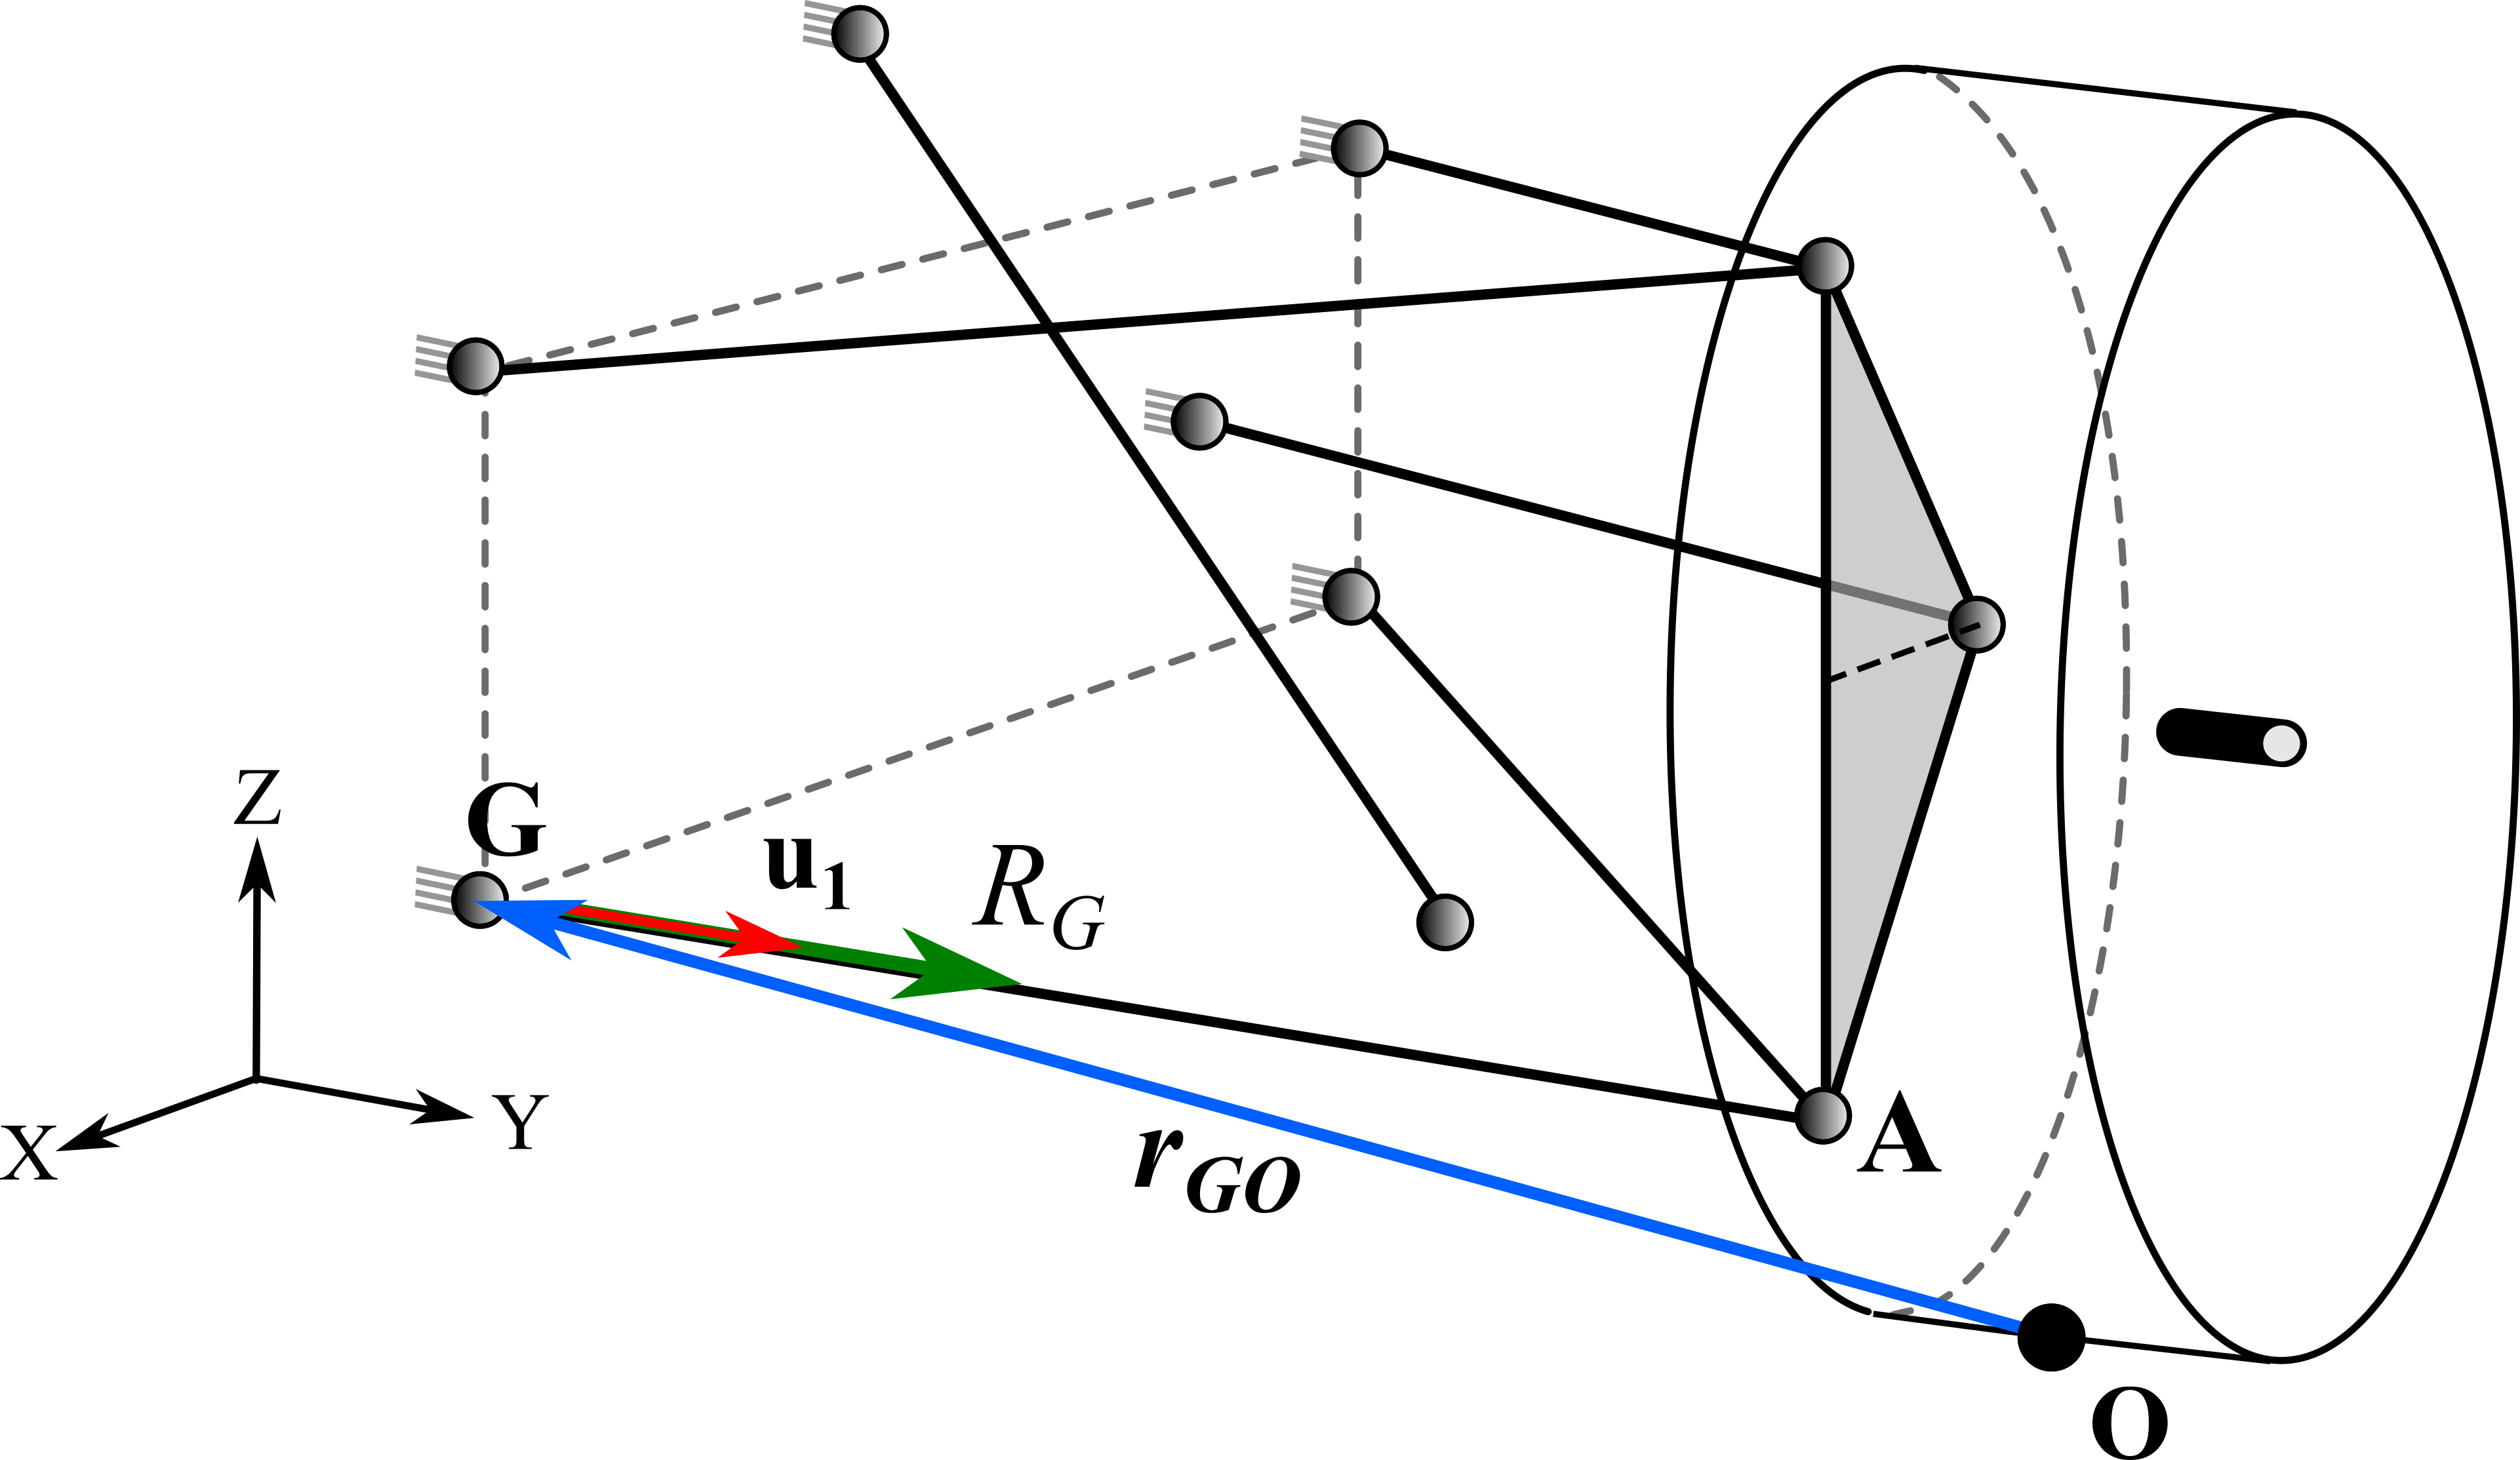

In [10]:
from IPython.display import Image
Image('double_wishbone_r_vector.png', width=500)

This is given by 

$\vec M_O = \left | R_G \right | \cdot (\vec r_{GO}\times \vec u_{1})$

where,
$\vec r_{GO} = \vec{GO} = O - G$

Since the magnitude of the force $R_G$ is given in vector $x$, in matrix $A$ we are going to consider only the moment arm $\vec r_{GO}\times \vec u_{1}$, which is the [cross product](https://en.wikipedia.org/wiki/Cross_product) between $\vec r_{GO}$ and the unit vector $\vec u_1$.

In [11]:
O = Matrix(np.array([0, 0, 0]))
r_GO = O - G
r_GO, u_1, r_GO.cross(u_1)

(Matrix([
[-5],
[-6],
[-2]]), Matrix([
[5*sqrt(41)/41],
[4*sqrt(41)/41],
[            0]]), Matrix([
[  8*sqrt(41)/41],
[-10*sqrt(41)/41],
[ 10*sqrt(41)/41]]))

## Linear equations in $Ax = B$ matrix form

The matrix form of the six equations of equilibrium are given below. The $u_{1x}$ is the $x$ component of the vector  $\vec u_{1}$ and so on. In the same way, $(r_{GO}\times u_{1})_x$ is $x$ component of the cross product $(r_{GO}\times u_{1})$.

\begin{matrix} 
    \begin{bmatrix}
    u_{1x} & u_{2x} & u_{3x} & u_{4x} & u_{5x} & u_{6x} \\
    u_{1y} & u_{2y} & u_{3y} & u_{4y} & u_{5y} & u_{6y} \\
    u_{1z} & u_{2z} & u_{3z} & u_{4z} & u_{5z} & u_{6z} \\
    (r_{GO}\times u_{1})_x & (r_{KO}\times u_{2})_x & (r_{EO}\times u_{3})_x
    & (r_{DO}\times u_{4})_x & (r_{JO}\times u_{5})_x & (r_{HO}\times u_{6})_x \\
    (r_{GO}\times u_{1})_y & (r_{KO}\times u_{2})_y & (r_{EO}\times u_{3})_y
    & (r_{DO}\times u_{4})_y & (r_{JO}\times u_{5})_y & (r_{HO}\times u_{6})_y \\
    (r_{GO}\times u_{1})_z & (r_{KO}\times u_{2})_z & (r_{EO}\times u_{3})_z
    & (r_{DO}\times u_{4})_z & (r_{JO}\times u_{5})_z & (r_{HO}\times u_{6})_z \\         
\end{bmatrix}  
\cdot 
\begin{bmatrix} 
R_G  \\
R_K  \\
R_E  \\
R_D  \\
R_J  \\
R_H  \\
\end{bmatrix}
=
\begin{bmatrix} 
F_x  \\
F_y  \\
F_z  \\
M_x  \\
M_y  \\
M_z  \\
\end{bmatrix}
\end{matrix}

# $Ax = B$ numerical solution

The harpoints used in this example comes from the [FSAE.com topic](http://www.fsae.com/forums/showthread.php?11179-analysis-of-wishbones) for easy folow up. Note: there are two straightforward ways of constructing the moment equations, you could either balance the moments around the contact patch (as described above) or balance the moments around the wheel center. This is well [explained by Z](http://www.fsae.com/forums/showthread.php?11179-analysis-of-wishbones&p=33604&viewfull=1#post33604) in the topic.

In [2]:
def susp_forces(coordinates, force_vector):

    F = force_vector
    O = coordinates[0]
    A = coordinates[1]
    B = coordinates[2]
    Q = coordinates[3]
    D = coordinates[4]
    E = coordinates[5]
    K = coordinates[6]
    G = coordinates[7]
    H = coordinates[8]
    I = coordinates[9]
    J = coordinates[10]
    
    # Unit vectors
    u_1 = Matrix(G - A).normalized()
    u_2 = Matrix(K - A).normalized()
    u_3 = Matrix(E - B).normalized()
    u_4 = Matrix(D - B).normalized()
    u_5 = Matrix(J - I).normalized()
    u_6 = Matrix(H - Q).normalized()
    unit_vectors = [u_1, u_2, u_3, u_4, u_5, u_6]

    # r vectors
    r_OG = Matrix(G - O)
    r_OE = Matrix(E - O)
    r_OD = Matrix(D - O)
    r_OK = Matrix(K - O)
    r_OH = Matrix(H - O)
    r_OJ = Matrix(J - O)
    r_vectors = [r_OG, r_OK, r_OE, r_OD, r_OJ, r_OH]

    # Building A and B matrix

    A_upper = zeros(3,6)
    for j in range(6):
        for i in range(3):
            A_upper[i,j] = float(unit_vectors[j][i])

    A_lower = zeros(3,6)
    for j in range(6):
        for i in range(3):
            A_lower[i,j] = float(r_vectors[j].cross(unit_vectors[j])[i])/1000

    A = Matrix([[A_upper],[A_lower]])     
    B = Matrix([F[0], F[1], F[2], 0, 0, 0])

    # Solve x for A and B
    x = A.inv()*B

    # Printing reaction forces in [N]
    R_G, R_K, R_E, R_D, R_J, R_H  = np.array(symbols('R_G R_K R_E R_D R_J R_H'))
    
    return x, Matrix([[R_G], [R_K], [R_E], [R_D], [R_J], [R_H]])

In [18]:
def plot_vector(point_1, point_2, color_vector, label):
    
    x_vector = np.array([point_1[0], point_2[0]])
    y_vector = np.array([point_1[1], point_2[1]])
    z_vector = np.array([point_1[2], point_2[2]])
    
    ax0.plot(x_vector, -y_vector, label=label)
    ax1.plot(x_vector, z_vector,  label=label)
    ax2.plot(y_vector,z_vector,  label=label)
    
    ax0.scatter(x_vector, -y_vector, color='k')
    ax1.scatter(x_vector, z_vector, color='k')
    ax2.scatter(y_vector,z_vector, color='k')
    
    ax0.set_title('upper view')
    ax1.set_title('lateral view')
    ax2.set_title('front view')
    
    ax0.set_aspect('equal')
    ax1.set_aspect('equal')
    ax2.set_aspect('equal')
    
    ax2.legend()

(Matrix([
[-706.844136886457],
[ 2318.54871728814],
[ 410.390832183452],
[-693.435739188224],
[ 1046.35331054682],
[-568.377481091224]]), Matrix([
[R_G],
[R_K],
[R_E],
[R_D],
[R_J],
[R_H]]))

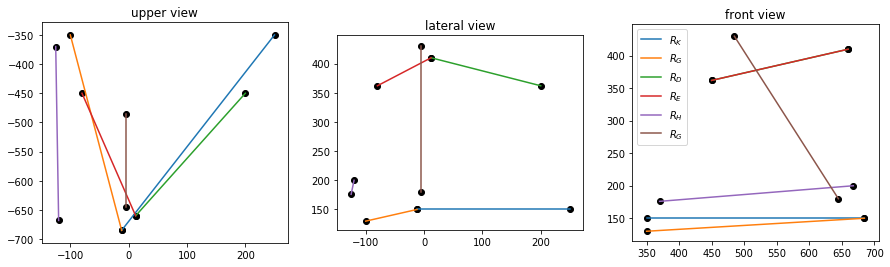

In [19]:
# force vector [N]
force_vector = np.array([1000, -1000, 1000]) 

# Suspension hardpoints x,y,z coordinates [mm]
O = np.array([0, 750, 0]) # origin
A = np.array([-12, 685, 150])
B = np.array([12, 660, 410])
Q = np.array([-120, 668, 200])
D = np.array([200, 450, 362])
E = np.array([-80, 450, 362])
K = np.array([250, 350, 150])
G = np.array([-100, 350, 130])
H = np.array([-125, 370, 176])
I = np.array([-5, 645, 180])
J = np.array([-5, 485, 430])

coordinates = O, A, B, Q, D, E, K, G, H, I, J

fig = plt.figure(figsize=(15, 15/3))
ax0, ax1, ax2 = fig.subplots(ncols=3)

plot_vector(K, A, 'r', '$R_K$')
plot_vector(G, A, 'r', '$R_G$')
plot_vector(D, B, 'b', '$R_D$')
plot_vector(E, B, 'b', '$R_E$')
plot_vector(H, Q, 'g', '$R_H$')
plot_vector(J, I, 'purple', '$R_G$')

results = susp_forces(coordinates, force_vector)
results

# References

[[1]](http://www.fsae.com/forums/showthread.php?11179-analysis-of-wishbones) FSAE.com (2012). Thread: Analysis of Wishbones. Acessed in March, 2020.

[[2]](https://www.amazon.com/Vector-Mechanics-Engineers-Statics-Dynamics/dp/0073398241) Beer, F., Johnston, E., et al. (2015). Vector Mechanics for Engineers: Statics and Dynamics. McGraw-Hill Education (11th Edition)

[[3](https://doi.org/10.1007/978-3-319-19596-4)] Malthe-Sørenssen, A. (2015). Elementary Mechanics Using Python. Springer.

[[4](https://doi.org/10.7717/peerj-cs.103)] Meurer A, Smith CP, et al. (2017) SymPy: symbolic computing in Python. PeerJ Computer Science 3:e103 